# Business Understanding

Het bedrijf PerkinElmer verzameld samples van koeien om daar uit op te maken welke hoeveelheid aan lactose, eiwitten en vetten er in de melk zitten. Op deze manier kunnen ze bepalen hoeveel de boer uitbetaald moet worden gebaseerd op meestal de vetten en/of de eiwitten. 
De officiele methode is duur, kost veel tijd en is alleen specifiek voor dat component dat getest is. Kortom ze zoeken een methode die sneller is, goedkoper en het moet meerdere componenten tegelijk kunnen analyseren.
De alternatieve methode wordt gedaan door een infrarood analysis uit te voeren en zit je dus al te kijken naar het licht spectrum. Verschillende moleculen reageren daar anders op binnen de infrarood range.

### Het infrarood licht

- Near Infrared ~ 700 - 3000nm (0.7 - 3µm)
- Mid Infrared ~ 3000 - 50000nm (3 - 50µm, 3000 - 200cm-1)
- Far Infrared ~ 50000 - 100000nm (50 - 1000µm)

### Meest belangrijke areas:

- Fingerprint (Protein)	        1000 - 1585cm-1 
- C=O (Lactose)			1700 - 1700cm-1
- CH2 (vet)	            2800 - 3000cm-1

Het is aan ons als groep om een model te bedenken die de verhouding tussen vetten, eiwitten en lactose kan bepalen door gebruik te maken van de LASSO techniek.

Het lastige hieraan is dat bijvoorbeeld vet en lactose op dezelfde infrarood frequency kunnen zitten. Daar moet dus onderscheid tussen gemaakt worden. Omdat ze veel op elkaar lijken.

# Data Understanding

Om een model te bedenken hebben wij 48 samples gekregen in .spc file format. Daarin zitten nog per sample 3 replica's. Replica's is een herhaling van hetzelfde sample maar meer om te kijken of deze wel overeen komen en dus vertrouwlijk zijn voor dat sample. 
Daar zouden wij dan een gemiddelde uit kunnen gaan halen???

Daarnaast hebben wij een excel sheet gekregen met daarin de waardes voor vet, eiwitten en lactose voor elke sample. Dit zijn dus onze **Labels**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Label Data

In [81]:
reference_data = pd.read_excel (r'.\Reference values.xlsx')

<AxesSubplot:>

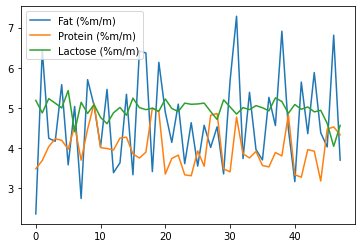

In [82]:
reference_data.plot()

In [83]:
print(reference_data.shape)
reference_data.head()

(48, 4)


,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,2.362,3.486,5.189
1,Sample 2.spc,6.438,3.692,4.878
2,Sample 3.spc,4.245,4.038,5.233
3,Sample 4.spc,4.171,4.235,5.120
4,Sample 5.spc,5.580,4.195,5.000


Zoals hierboven te zien is laat de label data precies zien welke hoeveelheid van vet, eiwitten en lactose er per sample is gemeten.

## Feature Data

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


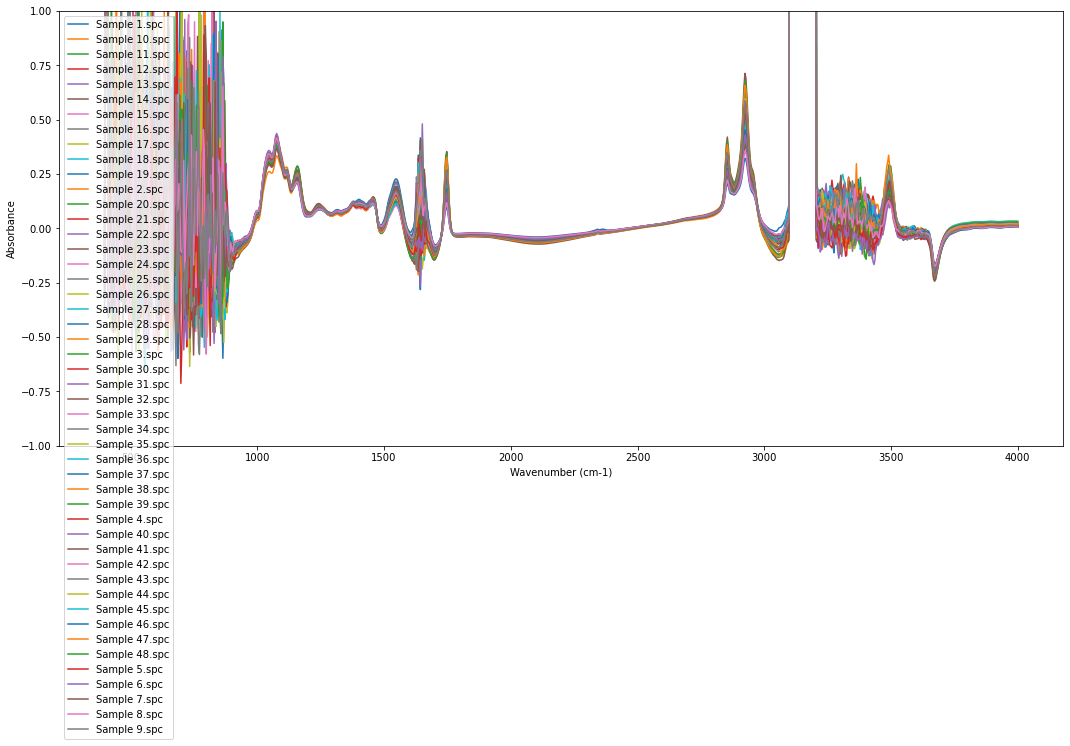

In [84]:
from pyspectra.readers.read_spc import read_spc_dir

df_spc, dict_spc=read_spc_dir('Spectra')

f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbance")
ax.legend(labels= list(df_spc.transpose().columns))
plt.ylim([-1,1])
plt.show()

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


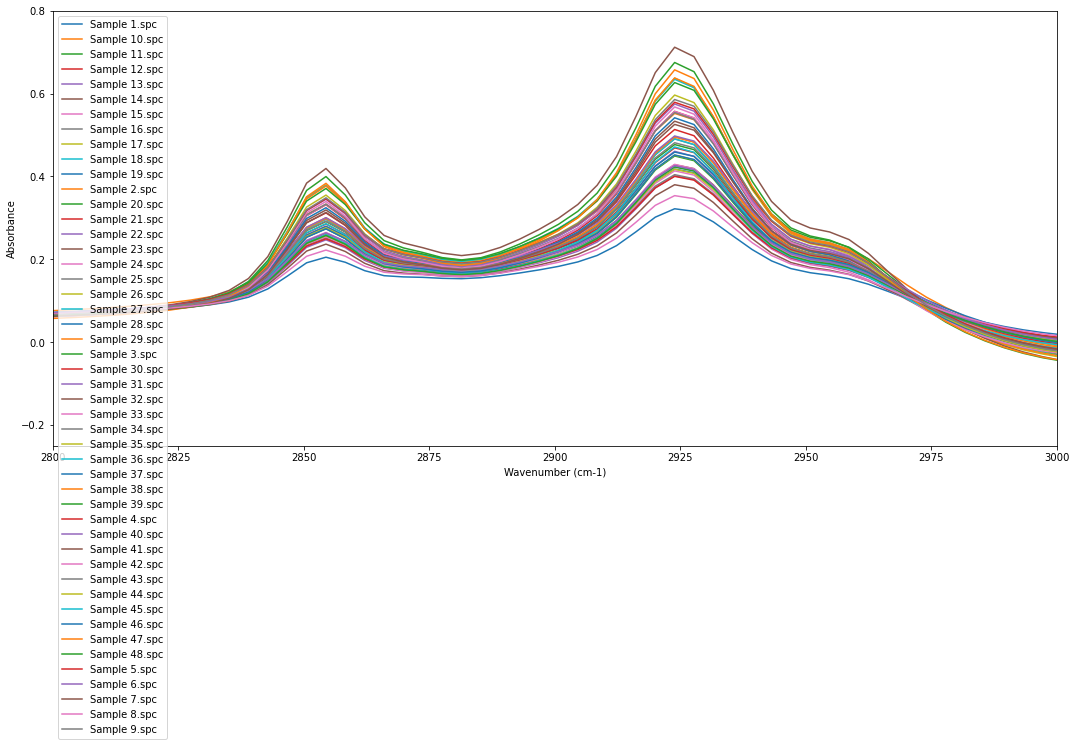

In [85]:
df_spc, dict_spc=read_spc_dir('Spectra')

f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbance")
ax.legend(labels= list(df_spc.transpose().columns))
plt.ylim([-0.25,0.80])
plt.xlim([2800,3000])
plt.show()

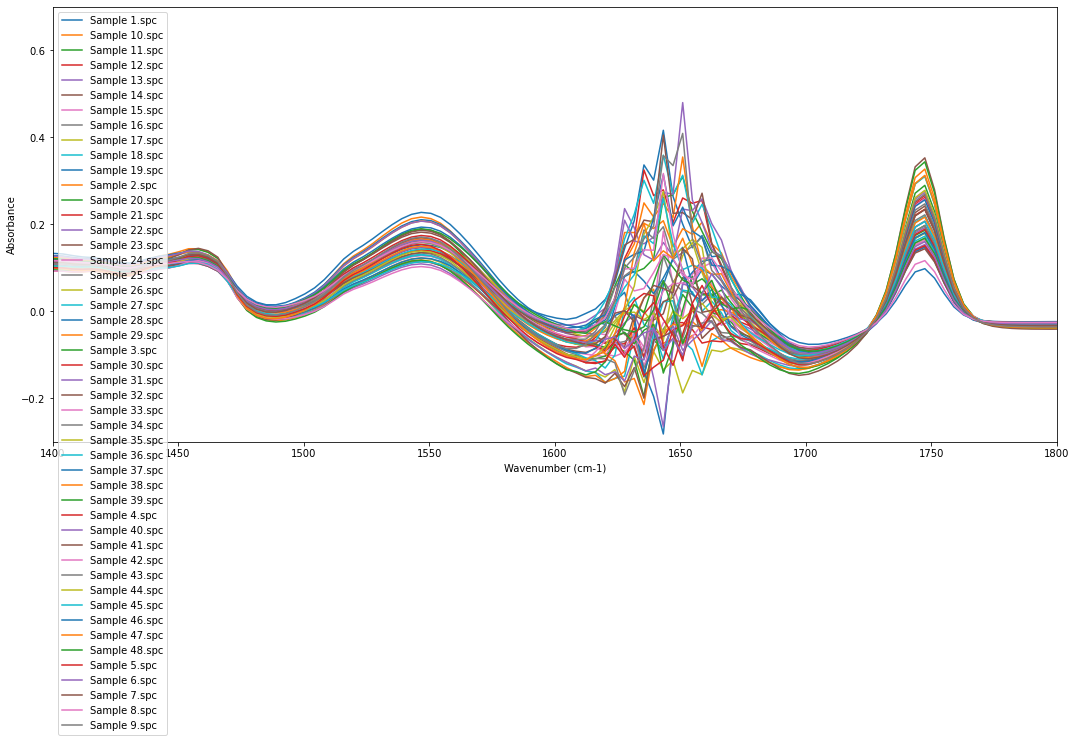

In [89]:
f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbance")
ax.legend(labels= list(df_spc.transpose().columns))
plt.ylim([-0.3,0.70])
plt.xlim([1400,1800])
plt.show()

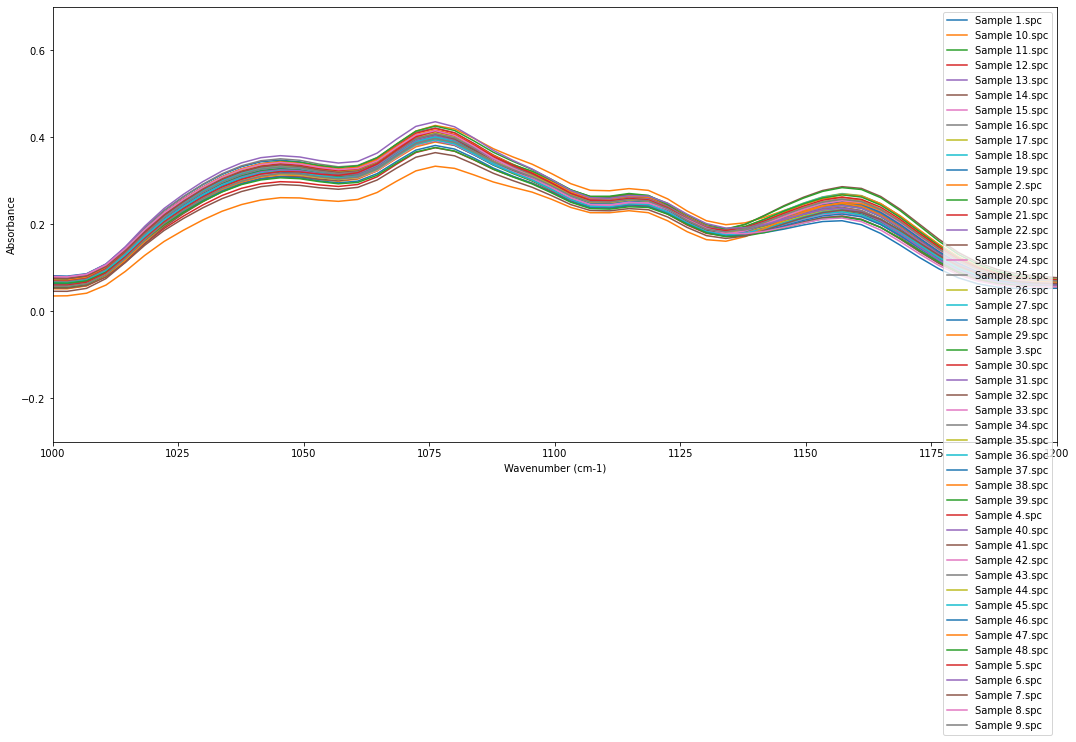

In [92]:
f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbance")
ax.legend(labels= list(df_spc.transpose().columns))
plt.ylim([-0.3,0.70])
plt.xlim([1000,1200])
plt.show()

In de visualisaties is duidelijk te zien dat de meeste samples overeen komen. De belangrijke waardes voor de metingen zitten tussen de 1000 en 3000. Tot 1000 is veel ruis te zien. Dat is meestal water en niet relevant voor ons model, dat hebben wij te horen gekregen van de opdrachtgever die hier een expert in is. Daarnaast boven de 3000 is een hoge piek te zien. Dit is ook niet relevant voor ons want dat is de conduit van de sensor. Wat wel belangrijk is, is dat er tussen de 1000 en 1200 een aantal steigingen zijn. Tusse 1500 en 1800 gebeurt dit weer en dit keer zien we ook weer een ruis waarbij elke sample wel iets verschillends laat zien qua pieken. En tussen 2800 en 3000 zijn er ook aantal pieken waarbij alle samples ongeveer gelijk lopen.

Volgens de presentatie van onze opdrachtgever klopt dit dus ook wat in de visualisaties te zien is.

Wat hierin wel fout gaat is dat ik alleen de derde subfile te pakken heb. Per sample zijn er 3 replica's gemaakt en wil ik ze ook alle 3 per sample kunnen zien. Daarom zal de pyspectra library niet voldoende zijn voor deze opdracht omdat ik niet in de subfiles kan van een sample, daarom ga ik daarna de spc library gebruiken. Ik kijk nog even verder daar deze data en zal daarna bezig gaan met de subfiles.

In [7]:
print(df_spc.shape)
df_spc.index.name = "samplename"
df_spc.head()

(48, 935)


,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
samplename,,,,,,,,,,,,,,,,,,,,,
Sample 1.spc,0.102523,1.008154,1.008154,1.008154,0.108095,0.386348,0.587932,0.636955,0.505134,0.120575,...,0.008786,0.009086,0.009137,0.008949,0.008572,0.008057,0.007464,0.006890,0.006382,0.005994
Sample 10.spc,-0.079924,1.008154,1.008154,1.008154,0.005067,-0.125471,-0.076960,0.003513,0.189936,0.184983,...,0.016217,0.016301,0.016317,0.016264,0.016161,0.016062,0.015982,0.015956,0.016003,0.016133
Sample 11.spc,-0.323271,1.008154,1.008154,1.008154,-0.067009,0.398773,0.422958,-0.073452,-0.072329,0.295611,...,0.012406,0.012486,0.012379,0.012118,0.011754,0.011350,0.010947,0.010624,0.010413,0.010328
Sample 12.spc,-0.136930,1.008154,1.008154,1.008154,-0.138287,0.183399,0.176318,0.156126,-0.348701,-0.478711,...,0.015737,0.015781,0.015683,0.015497,0.015239,0.014953,0.014692,0.014525,0.014455,0.014493
Sample 13.spc,0.125331,1.008154,1.008154,1.008154,0.475342,0.750735,0.008357,-0.252117,-0.339127,-0.228932,...,0.007578,0.007749,0.007698,0.007442,0.007046,0.006575,0.006088,0.005640,0.005292,0.005095


In de head is te zien dat de metingen beginnen vanaf 397 tot en met 4000, nu is de vraag of ik alle colommen nodig zal hebben.

<AxesSubplot:xlabel='wavenumber', ylabel='absorbance'>

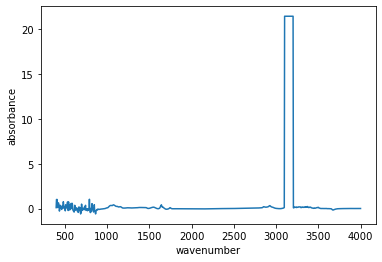

In [8]:
df_spc.iloc[0, :].plot(xlabel='wavenumber', ylabel='absorbance')

Hierboven is alleen een visualisatie te zien van sample 1 en eigenlijk lijkt deze gewoon precies op de voorgaande visualisaties.

In [9]:
df_spc.dtypes

397.306909     float64
401.164258     float64
405.021606     float64
408.878955     float64
412.736304     float64
                ...   
3984.641138    float64
3988.498486    float64
3992.355835    float64
3996.213184    float64
4000.070532    float64
Length: 935, dtype: object

In [10]:
df_spc.dtypes.value_counts()

float64    935
dtype: int64

Ik kan hier uit opmaken dat het allemaal floats zijn die zich binnen dit dataframe bevinden.

In [11]:
df_spc.describe()

,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.019101,1.008154,1.008154,1.008154,0.045130,0.092672,0.039434,0.082148,0.076916,-0.004282,...,0.014376,0.014484,0.014439,0.014262,0.013983,0.013665,0.013361,0.013117,0.012963,0.012931
std,0.263529,0.000000,0.000000,0.000000,0.292574,0.299831,0.243963,0.309153,0.301658,0.234862,...,0.006178,0.006163,0.006176,0.006215,0.006277,0.006355,0.006453,0.006561,0.006661,0.006748
min,-0.374078,1.008154,1.008154,1.008154,-0.411707,-0.362181,-0.322525,-0.471212,-0.378885,-0.478711,...,0.005679,0.005765,0.005697,0.005502,0.005196,0.004851,0.004517,0.004238,0.004064,0.004033
25%,-0.148084,1.008154,1.008154,1.008154,-0.181972,-0.126833,-0.150936,-0.127969,-0.133574,-0.181997,...,0.009990,0.010106,0.010031,0.009787,0.009402,0.008964,0.008552,0.008189,0.007926,0.007807
50%,-0.060777,1.008154,1.008154,1.008154,0.017970,0.001754,0.002790,0.066113,0.026855,-0.047493,...,0.012522,0.012608,0.012591,0.012422,0.012126,0.011816,0.011566,0.011209,0.010951,0.010839
75%,0.150368,1.008154,1.008154,1.008154,0.206894,0.385710,0.159366,0.244046,0.289392,0.152255,...,0.016332,0.016427,0.016421,0.016320,0.016130,0.015992,0.015915,0.015909,0.015983,0.016084
max,0.691449,1.008154,1.008154,1.008154,0.888871,0.750735,0.716278,1.104684,0.923787,0.643752,...,0.032885,0.032944,0.032911,0.032801,0.032630,0.032445,0.032323,0.032285,0.032303,0.032418


Hierboven zien wij onze feature data. Daarmee moeten wij een model maken die dus kan voorspellen welke hoeveelheid vet, eitwitten en lactose er in een sample zit die nog niet is gemeten. 

# Subfiles feature data

Elk sample heeft dus 3 replica's om aan te kunnen tonen dat de sample betrouwbaar is als alle recplica's overeen komen. Toch zal daar iets verschil in zitten. Daarom wil ik daar een gemiddelde uit halen van deze 3.

In [93]:
import spc_spectra as spc
from pathlib import Path
import pandas as pd
import numpy as np

In [94]:
df_total = []

for file in Path('./Spectra').iterdir(): #glob('Sample *.spc'):
    f = spc.File(file)
    sample_df = pd.DataFrame(np.array([f.sub[0].y,f.sub[1].y,f.sub[2].y]),columns=f.x)
    sample_df.insert(loc=0, column='s_name', value=file)
    df_total.append(sample_df)
df_total = pd.concat(df_total)
print(df_total)

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
                   s_name  397.30690917943  401.16425781224  405.02160644505  \
0    Spectra\Sample 1.spc         0.469832         1.008154         1.008154   
1    Spectra\Sample 1.spc        -0.135354         1.008154         1.008154   
2    Spectra\Sample 1.spc         0.102523         1.008154         1.008154   
0   Spectra\Sample 10.spc        -0.355521         1.008154         1.008154   
1   Spectra\Sample 10.spc        -0.374311         1.008154         1.008154   
..                    ...              ...              ...              ...   
1    Spectra\Sample 8.spc         0.824058         1.008

In [95]:
print(df_total.shape)
df_total.head()

(144, 936)


,s_name,397.30690917943,401.16425781224,405.02160644505,408.87895507786004,412.73630371067003,416.59365234348,420.45100097629,424.3083496091,428.16569824191004,...,3965.35439452868,3969.21174316149,3973.0690917942998,3976.92644042711,3980.78378905992,3984.64113769273,3988.49848632554,3992.35583495835,3996.21318359116,4000.07053222397
0,Spectra\Sample 1.spc,0.469832,1.008154,1.008154,1.008154,0.052305,0.115211,0.258473,-0.136622,-0.067475,...,0.008624,0.008933,0.008978,0.008795,0.008411,0.007903,0.007321,0.006737,0.006204,0.005813
1,Spectra\Sample 1.spc,-0.135354,1.008154,1.008154,1.008154,-0.016709,0.101999,0.034435,-0.187145,-0.057800,...,0.008906,0.009205,0.009256,0.009075,0.008686,0.008180,0.007607,0.007015,0.006492,0.006116
2,Spectra\Sample 1.spc,0.102523,1.008154,1.008154,1.008154,0.108095,0.386348,0.587932,0.636955,0.505134,...,0.008786,0.009086,0.009137,0.008949,0.008572,0.008057,0.007464,0.006890,0.006382,0.005994
0,Spectra\Sample 10.spc,-0.355521,1.008154,1.008154,1.008154,-0.322469,-0.030074,0.006049,0.194777,-0.155512,...,0.014614,0.014709,0.014709,0.014640,0.014527,0.014412,0.014326,0.014299,0.014337,0.014481
1,Spectra\Sample 10.spc,-0.374311,1.008154,1.008154,1.008154,0.024214,0.264530,0.061759,0.096896,-0.009429,...,0.016369,0.016460,0.016474,0.016417,0.016295,0.016165,0.016093,0.016077,0.016112,0.016253


In [15]:
df_total.describe()

,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.062091,1.008154,1.008154,1.008154,0.038926,0.041604,0.023389,0.055695,0.060582,-0.007331,...,0.014277,0.014385,0.014339,0.014161,0.013879,0.013558,0.013249,0.013000,0.012841,0.012806
std,0.297400,0.000000,0.000000,0.000000,0.303468,0.279022,0.275377,0.292416,0.275573,0.241485,...,0.006103,0.006086,0.006097,0.006133,0.006193,0.006272,0.006370,0.006474,0.006573,0.006660
min,-0.520073,1.008154,1.008154,1.008154,-0.411707,-0.423979,-0.578786,-0.624500,-0.394312,-0.520060,...,0.005346,0.005422,0.005357,0.005170,0.004869,0.004520,0.004184,0.003923,0.003771,0.003733
25%,-0.138649,1.008154,1.008154,1.008154,-0.182445,-0.170093,-0.158010,-0.131780,-0.147929,-0.182760,...,0.009867,0.009969,0.009898,0.009653,0.009301,0.008883,0.008438,0.008090,0.007863,0.007761
50%,0.011540,1.008154,1.008154,1.008154,-0.024488,-0.016108,-0.006690,0.039170,0.000661,-0.038658,...,0.012841,0.012917,0.012812,0.012596,0.012363,0.012076,0.011779,0.011414,0.011224,0.011160
75%,0.249822,1.008154,1.008154,1.008154,0.204933,0.227104,0.134478,0.243972,0.260466,0.143291,...,0.016060,0.016192,0.016164,0.016010,0.015908,0.015683,0.015276,0.015042,0.015000,0.015085
max,1.223340,1.008154,1.008154,1.008154,1.192200,0.750735,1.138654,1.104684,0.923787,0.737357,...,0.032885,0.032944,0.032911,0.032801,0.032630,0.032445,0.032323,0.032285,0.032303,0.032418


Wat we nu hebben is een dataframe met alle samples plus de replica's erin. Dit klopt ook want 48 samples keer 3 is 144 en we hebben 144 rows. Vanuit daar moet ik nu per sample het gemiddelde per colom berekenen. Daarna moet ik nog een range van tussen de 1000 en 3000 maken. Dat betekent dat ik een hoop collommen moet weg filteren.

Voor de duidelijkheid heb ik een colum toegevoegd genaamd `s_name` die de naam van de sample laat zien. Zo is het duidelijk over welk sample de replica gaat.

# Data Preparation

Op dit moment hebben we duidelijk wat onze references en features zijn. Nu moet nog bepaald worden hoe we deze met elkaar matchen en daaruit test en train data kunnen maken. 

Daarnaast moet bepaald worden of wij alle data gebruiken of dat wij daar al data uit gaan filteren die toch overbodig zijn. 

Wat ga ik doen: gemiddelde per sample met gelimiteerde van (1000-3000). Dat houdt in dat ik nu een dataframe heb met de benodigde data. Deze data moet per sample nog een gemiddelde over berekend worden. Daarna ga ik de data limiteren door alleen naar de colums tussen de 1000 en 3000 te kijken.

In [97]:
df_average = df_total.groupby(np.arange(len(df_total))//3).mean()

In [98]:
print(df_average.shape)
df_average.head()

(48, 935)


,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
0,0.145667,1.008154,1.008154,1.008154,0.047897,0.201186,0.293613,0.104396,0.126620,-0.012895,...,0.008772,0.009075,0.009124,0.008940,0.008556,0.008047,0.007464,0.006881,0.006359,0.005974
1,-0.269919,1.008154,1.008154,1.008154,-0.097729,0.036329,-0.003050,0.098396,0.008332,0.094464,...,0.015733,0.015823,0.015833,0.015774,0.015661,0.015546,0.015467,0.015444,0.015484,0.015622
2,-0.216030,1.008154,1.008154,1.008154,-0.187241,0.145264,0.201331,0.151591,0.219409,0.078085,...,0.011971,0.012060,0.011962,0.011706,0.011340,0.010936,0.010530,0.010188,0.009956,0.009868
3,-0.053435,1.008154,1.008154,1.008154,-0.034041,0.083567,-0.003909,-0.064949,-0.137298,0.216180,...,0.015902,0.015950,0.015858,0.015665,0.015404,0.015122,0.014871,0.014705,0.014629,0.014670
4,-0.062140,1.008154,1.008154,1.008154,0.005354,0.309896,0.042895,0.021930,0.086493,-0.204544,...,0.008087,0.008240,0.008175,0.007918,0.007530,0.007069,0.006590,0.006160,0.005822,0.005637


Nu heb ik het gemiddelde per sample. Vanuit daar hoef ik alleen de overbodige colums nog te verwijderen.

In [99]:
df_slice_data = df_average.iloc[:, 157:677]
df_slice_data.head()

,1002.910645,1006.767993,1010.625342,1014.482690,1018.340039,1022.197388,1026.054736,1029.912085,1033.769434,1037.626782,...,2970.158447,2974.015796,2977.873145,2981.730493,2985.587842,2989.445190,2993.302539,2997.159888,3001.017236,3004.874585
0,0.081063,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,0.314596,0.332060,...,0.105195,0.088565,0.073581,0.060170,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212
1,0.068501,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,0.300961,0.319057,...,0.137102,0.107968,0.082882,0.061273,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235
2,0.065522,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,0.282741,0.299282,...,0.111913,0.087998,0.067339,0.049432,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248
3,0.053757,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,0.266226,0.282283,...,0.110394,0.080877,0.056068,0.035027,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432
4,0.071849,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,0.293316,0.310138,...,0.111032,0.089792,0.071215,0.054863,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255


proberen de juiste colums te krijgen tussen de 1000 en 3000 daarbij kwam ik uit op de colums tussen 157 en 677 van de totaal 935 colums. Nu heb ik nog 520 colums over met alleen de nuttige data. Daar moet ik alleen nog een colom aan toevoegen met de namen van de samples die op de juiste wijze is gesorteerd.

In [101]:
df_valsspeler = pd.read_excel('help.xlsx')
df_valsspeler = df_valsspeler.set_index('index')
df_valsspeler.head()

,samplename
index,
0,Sample 1.spc
1,Sample 10.spc
2,Sample 11.spc
3,Sample 12.spc
4,Sample 13.spc


In [102]:
df_feature_avg = pd.concat([df_valsspeler,df_slice_data], axis=1)
df_feature_avg.head()

,samplename,1002.9106445306,1006.76799316341,1010.62534179622,1014.4826904290301,1018.34003906184,1022.19738769465,1026.05473632746,1029.91208496027,1033.76943359308,...,2970.1584472637,2974.01579589651,2977.87314452932,2981.73049316213,2985.58784179494,2989.44519042775,2993.30253906056,2997.15988769337,3001.01723632618,3004.87458495899
0,Sample 1.spc,0.081063,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,0.314596,...,0.105195,0.088565,0.073581,0.060170,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212
1,Sample 10.spc,0.068501,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,0.300961,...,0.137102,0.107968,0.082882,0.061273,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235
2,Sample 11.spc,0.065522,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,0.282741,...,0.111913,0.087998,0.067339,0.049432,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248
3,Sample 12.spc,0.053757,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,0.266226,...,0.110394,0.080877,0.056068,0.035027,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432
4,Sample 13.spc,0.071849,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,0.293316,...,0.111032,0.089792,0.071215,0.054863,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255


Wat ik nu heb gedaan is een colum samplename aan de gemiddelde data toegevoegd die op de juiste wijze is gesorteerd. 

In [114]:
reference_data.head()

,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,2.362,3.486,5.189
1,Sample 2.spc,6.438,3.692,4.878
2,Sample 3.spc,4.245,4.038,5.233
3,Sample 4.spc,4.171,4.235,5.120
4,Sample 5.spc,5.580,4.195,5.000


Ik haal hier alleen de reference_data opnieuw op zodat ik niet telkens naar boven hoef te scrollen.

In [115]:
df_combined = pd.merge(df_feature_avg, reference_data, left_on=df_feature_avg.samplename, right_on=reference_data.Sample)
df_combined.head()

,key_0,samplename,1002.9106445306,1006.76799316341,1010.62534179622,1014.4826904290301,1018.34003906184,1022.19738769465,1026.05473632746,1029.91208496027,...,2985.58784179494,2989.44519042775,2993.30253906056,2997.15988769337,3001.01723632618,3004.87458495899,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,Sample 1.spc,0.081063,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,...,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212,Sample 1.spc,2.362,3.486,5.189
1,Sample 10.spc,Sample 10.spc,0.068501,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,...,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235,Sample 10.spc,5.059,5.115,5.085
2,Sample 11.spc,Sample 11.spc,0.065522,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,...,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248,Sample 11.spc,4.035,4.012,4.764
3,Sample 12.spc,Sample 12.spc,0.053757,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,...,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432,Sample 12.spc,5.463,3.991,4.607
4,Sample 13.spc,Sample 13.spc,0.071849,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,...,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255,Sample 13.spc,3.389,3.953,4.880


Wat we nu zien is dat we een dataframe hebben waarin de features en reference data zijn samengevoegd op de sample name. Op deze manier hebben we de reference data zo gesorteerd waardoor ze overeen komen met de features data. Daarna kan ik de reference data hier vanaf halen voor het gebruik in ons model.

Dat moet ik doen voor elke waarde voor vet, eiwit en lactose.

In [116]:
ref_data_lactose = df_combined.iloc[:,-1]
ref_data_lactose.head()

0    5.189
1    5.085
2    4.764
3    4.607
4    4.880
Name: Lactose (%m/m), dtype: float64

In [117]:
ref_data_protein = df_combined.iloc[:,-2]
ref_data_protein.head()

0    3.486
1    5.115
2    4.012
3    3.991
4    3.953
Name: Protein (%m/m), dtype: float64

In [118]:
ref_data_fat = df_combined.iloc[:,-3]
ref_data_fat.head()

0    2.362
1    5.059
2    4.035
3    5.463
4    3.389
Name: Fat (%m/m), dtype: float64

Nu is er een dataframe voor elk van de references: vet, lactose en eitwit. Daarmee kan ik deze references makkelijk runnen in het Lasso model om daar 3 modellen van te maken.

# Modeling

Wij hebben met de groep afgesproken dat wij dus voor iedere waarde een model maken dus krijgen daar 3 modellen voor. Daarnaast doen wij dit 1 keer met het gebruik van train_test_split en 1 keer zonder de functie. Daardoor krijgen wij dus totaal per persoon 6 modellen om te vergelijken of dit nog effect heeft gehad.

Wat wij ook hebben afgesproken is dat wij een random_state van 11 voor de train_test_split en voor de LassoCV gebruiken en voor de test_size 0.2 gebruiken. Daardoor weten we dat het betrouwbaar is om onze uitkomsten met elkaar te vergelijken.

## Vet modeling

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

### Met train_test_split

In [119]:
X_train_vet, X_test_vet, y_train_vet, y_test_vet = train_test_split(df_slice_data, ref_data_fat, test_size=0.2, random_state=11)

In [134]:
lasso_result_fat = LassoCV(cv=5, random_state=11).fit(X_train_vet,y_train_vet)

H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012454219260601243, tolerance: 0.004684755507894736
  model = cd_fast.enet_coordinate_descent(


In [135]:
lasso_result_fat.score(X_test_vet,y_test_vet)

0.9998808838902614

Ik ben begonnen met het opdelen van de data in test en train variabelen. De test size staat op 20% zodat ik genoeg train data over heb om het model op te trainen. 

Hierna voer in Lasso uit via de `LassoCV` functie met een crossvalidatie van 5 dus wordt de data 5 keer gesplitst en over elke een keer een model berekent. Tegelijkertijd wordt er gefit op de train data en het gesultaat in `lasso_result_vet` stopt.

Als ik naar de score kijk zie ik dat het model voor 99% overeenkomsten ziet dat betekent dat dit model het zeer goed heeft gedaan.

In [136]:
lasso_result_fat.alphas_

array([9.54295254e-02, 8.89978948e-02, 8.29997346e-02, 7.74058302e-02,
       7.21889364e-02, 6.73236437e-02, 6.27862554e-02, 5.85546719e-02,
       5.46082830e-02, 5.09278675e-02, 4.74954997e-02, 4.42944620e-02,
       4.13091635e-02, 3.85250641e-02, 3.59286037e-02, 3.35071361e-02,
       3.12488673e-02, 2.91427982e-02, 2.71786711e-02, 2.53469197e-02,
       2.36386221e-02, 2.20454581e-02, 2.05596680e-02, 1.91740152e-02,
       1.78817507e-02, 1.66765806e-02, 1.55526349e-02, 1.45044393e-02,
       1.35268887e-02, 1.26152216e-02, 1.17649979e-02, 1.09720764e-02,
       1.02325952e-02, 9.54295254e-03, 8.89978948e-03, 8.29997346e-03,
       7.74058302e-03, 7.21889364e-03, 6.73236437e-03, 6.27862554e-03,
       5.85546719e-03, 5.46082830e-03, 5.09278675e-03, 4.74954997e-03,
       4.42944620e-03, 4.13091635e-03, 3.85250641e-03, 3.59286037e-03,
       3.35071361e-03, 3.12488673e-03, 2.91427982e-03, 2.71786711e-03,
       2.53469197e-03, 2.36386221e-03, 2.20454581e-03, 2.05596680e-03,
      

Hierboven is een lijst te zien met alle alphas die gebruikt zijn voor het fitten.

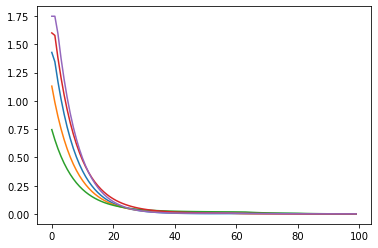

In [137]:
plt.plot(lasso_result_fat.mse_path_)

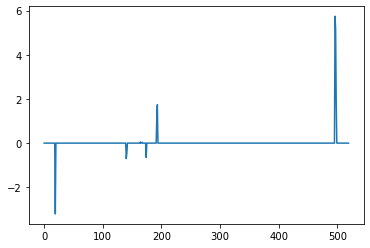

In [138]:
plt.plot(lasso_result_fat.coef_)

Nu kan ik zoals hierboven een plot maken van het model. Alleen klopt deze visualisatie niet. Deze hoort op te lopen in plaats van af te lopen omdat het model met steeds hogere alphas werkt.

Daarom moet ik het resultaat eerst omzetten naar een dataframe met de `Mean square error` voor de test set voor elke fold van de cross validatie.
Daarna wil de data transposen zodat de columns de alphas worden van het resultaat.

In [139]:
df_result_fat= pd.DataFrame(lasso_result_fat.mse_path_)
df_result_fat_t = df_result_fat.T
df_result_fat_t.columns = lasso_result_fat.alphas_

In [140]:
df_result_fat_t

,0.095430,0.088998,0.083000,0.077406,0.072189,0.067324,0.062786,0.058555,0.054608,0.050928,...,0.000179,0.000167,0.000156,0.000145,0.000135,0.000126,0.000118,0.000110,0.000102,0.000095
0,1.429034,1.346354,1.170258,1.017165,0.884075,0.768378,0.667804,0.580381,0.504392,0.438344,...,0.000760,0.000685,0.000624,0.000568,0.000518,0.000479,0.000445,0.000414,0.000387,0.000365
1,1.130813,0.987305,0.862282,0.753350,0.658426,0.575697,0.503586,0.440722,0.385909,0.338108,...,0.000408,0.000406,0.000407,0.000411,0.000419,0.000430,0.000444,0.000455,0.000469,0.000491
2,0.746129,0.656159,0.577569,0.508901,0.448883,0.396408,0.350513,0.310357,0.275209,0.244432,...,0.001719,0.001535,0.001374,0.001234,0.001113,0.001003,0.000907,0.000824,0.000751,0.000688
3,1.601538,1.579518,1.380029,1.206146,1.054559,0.922386,0.807123,0.706587,0.618879,0.542346,...,0.000543,0.000527,0.000514,0.000503,0.000493,0.000485,0.000481,0.000477,0.000474,0.000471
4,1.749065,1.749065,1.594210,1.378695,1.191872,1.029961,0.889678,0.768170,0.662958,0.571887,...,0.000763,0.000735,0.000709,0.000685,0.000664,0.000645,0.000627,0.000611,0.000597,0.000583


Nu heb ik een dataframe met daarin alle alphas als columns en ziet het ernaar uit dat ik deze data kan plotten.

<AxesSubplot:>

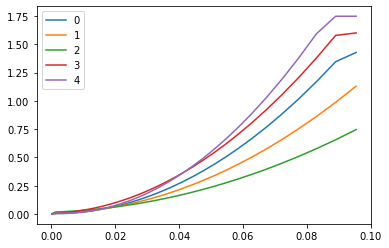

In [141]:
df_result_fat_t.T.plot()

Met de visualisatie hierboven kan ik nu duidelijk het verschil zien in elke uitkomst van de cross validatie. Er is dus te zien dat alle 5 folds dicht bij de 0 beginnen en dus een sterk model is. Naarmate de alpha groter wordt is te zien dat alle 5 folds dicht bij elkaar liggen en geleidelijk groter worden.

### Zonder train_test_split

In [130]:
lasso_result_fat1 = LassoCV(cv=5, random_state=11).fit(df_slice_data,ref_data_fat)

H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01677261093680652, tolerance: 0.006353712997916667
  model = cd_fast.enet_coordinate_descent(


In [131]:
lasso_result_fat1.score(df_slice_data,ref_data_fat)

0.9998234492422923

In [132]:
df_result_fat1= pd.DataFrame(lasso_result_fat1.mse_path_)
df_result_fat_t1 = df_result_fat1.T
df_result_fat_t1.columns = lasso_result_fat1.alphas_

<AxesSubplot:>

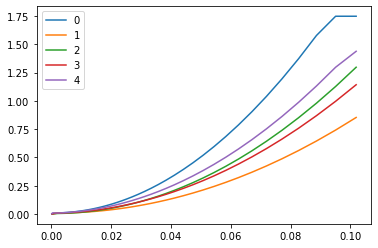

In [133]:
df_result_fat_t1.T.plot()

## Lactose Modeling

### Met train_test_split

In [60]:
X_train_lactose, X_test_lactose, y_train_lactose, y_test_lactose = train_test_split(df_slice_data, ref_data_lactose, test_size=0.2, random_state=11)

In [61]:
lasso_result_lactose = LassoCV(cv=5, random_state=11).fit(X_train_lactose,y_train_lactose)

H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009839043859250533, tolerance: 0.00015946753684210522
  model = cd_fast.enet_coordinate_descent(


In [147]:
lasso_result_lactose.score(X_test_lactose,y_test_lactose)

0.9991318542106732

In [149]:
df_result_lactose= pd.DataFrame(lasso_result_lactose.mse_path_)
df_result_lactose_t = df_result_lactose.T
df_result_lactose_t.columns = lasso_result_lactose.alphas_

<AxesSubplot:>

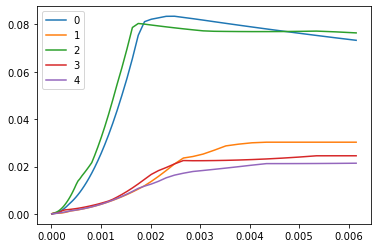

In [150]:
df_result_lactose_t.T.plot()

Voor Lactose heb ik hetzelfde principe gebruikt als voor vet. Hier kwam ook een resultaat van 99% uit voor overeenkomst. Alleen is deze wel iets minder sterk vergeleken met vet, om precies te zijn met 0.0007 verschil doet deze het slechter.

Wat er in de visualisatie is te zien dat nummer 2 en 0 het veel slechter doet dan de overige 3, de anderen liggen allemaal redelijk gelijk. Net als bij vet is te zien dat dit een sterk model is doordat ze allemaal bij de 0 liggen, naarmate alpha groter wordt wordt dit verschill erg groot.

### Zonder train_test_split

In [151]:
lasso_result_lactose1 = LassoCV(cv=5, random_state=11).fit(df_slice_data,ref_data_lactose)

H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002291858899403608, tolerance: 0.00022639087631578947
  model = cd_fast.enet_coordinate_descent(
H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014218490384041438, tolerance: 0.00026074678125
  model = cd_fast.enet_coordinate_descent(


In [152]:
lasso_result_lactose1.score(df_slice_data,ref_data_lactose)

0.9994939332031455

In [145]:
df_result_lactose1= pd.DataFrame(lasso_result_lactose1.mse_path_)
df_result_lactose_t1 = df_result_lactose1.T
df_result_lactose_t1.columns = lasso_result_lactose1.alphas_

<AxesSubplot:>

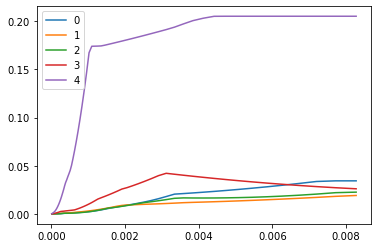

In [146]:
df_result_lactose_t1.T.plot()

## Protein Modeling

### Met train_test_split

In [66]:
X_train_protein, X_test_protein, y_train_protein, y_test_protein = train_test_split(df_slice_data, ref_data_protein, test_size=0.2, random_state=11)

In [67]:
lasso_result_protein = LassoCV(cv=5, random_state=11).fit(X_train_protein,y_train_protein)

H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0068665922131724635, tolerance: 0.0010309639078947368
  model = cd_fast.enet_coordinate_descent(


In [153]:
lasso_result_protein.score(X_test_protein,y_test_protein)

0.9970469776111104

In [154]:
df_result_protein= pd.DataFrame(lasso_result_protein.mse_path_)
df_result_protein_t = df_result_protein.T
df_result_protein_t.columns = lasso_result_protein.alphas_

<AxesSubplot:>

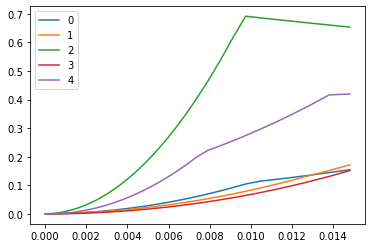

In [160]:
df_result_protein_t.T.plot()

Voor de eiwitten heb ik ook net als lactose en vet hetzelfde principte toegepast. Het resultaat was ook hiervoor 99%, alleen zit er toch weer verschil tussen alle 3. Hierbij zit er 0.0004 verschil met vet en 0.0003 met lactose. Protein ligt er dus mooi tussen.

In de visualisatie is te zien dat eigenlijk alle 5 uitkomsten van de cross validatie verschillen. Deze visualisatie lijkt weer erg op die van vet en beginnen allemaal bij de 0, daarna verschillen ze allemaal geleidelijk. 

### Zonder train_test_split

In [156]:
lasso_result_protein1 = LassoCV(cv=5, random_state=11).fit(df_slice_data,ref_data_protein)

H:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009403797551613259, tolerance: 0.001211542947916667
  model = cd_fast.enet_coordinate_descent(


In [157]:
lasso_result_protein1.score(df_slice_data,ref_data_protein)

0.9994882164321088

In [158]:
df_result_protein1= pd.DataFrame(lasso_result_protein1.mse_path_)
df_result_protein_t1 = df_result_protein1.T
df_result_protein_t1.columns = lasso_result_protein1.alphas_

<AxesSubplot:>

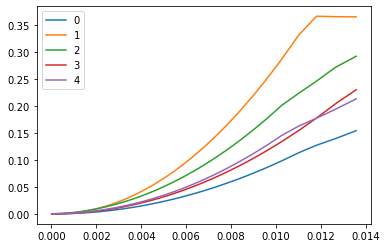

In [161]:
df_result_protein_t1.T.plot()

# Evaluation

Als we kijken naar de resultaten dan is te zien dat we voor alles 99% aan overeenkomsten halen. Toch is er overal verschil te zien. Onderling tussen de waardes vet, eiwit en lactose. Maar wat ik ook zie is dat als ik geen train_test_split gebruik het resultaat nog sterker is. Het verschil is minimaal maar toch te zien aan de scores en aan de visualisaties. Wat ik hier uit haal is dat wij beter zonder train_test_split kunnen werken en dus alles aan LassoCV overlaten. Dit verkleint het proces maakt het overzichtelijker en de uitkomst is nog sterker.

Mijn eigen evaluatie over dit thema is dat het begin erg duidelijk was. De Business Understanding begreep ik gelijk en heb ik beschreven, daarnaast kon ik hier makkelijk op door met de Data Understanding. Deze heb ik ook duidelijk beschreven en alles data makkelijk kunnen verkennen. Het begon voor mij wat lastiger te worden toen ik een andere library moest gebruiken om dan alle subfiles uit een sample te halen. Gelukkig heb ik dit samen met mijn groepje op kunnen lossen. 

Bij de data preparation moest ik daarna het gemiddelde over een sample bepalen, dit kon ik zelf redelijk eenvoudig toepassen. Ditzelfde ging redelijk makkelijk om colommen weg te laten zodat ik een range van tussen de 1000 en 3000 kreeg. Het lastige kwam daarna toen ik de reference data samen wilde voegen. De feature data staat namelijk alfabetisch gesorteerd dus sample 1, sample 10, sample 11 enz... Dit heb ik samen met Asscher op een lelijke wijze op kunnen lossen door een excel bestand aan te roepen met daarin de sample samen op de juiste manier gesorteerd. Vanaf daar kon ik de feature en reference data makkelijk mergen op de sample naam. Daardoor stond de reference data ook gelijk op de goede manier gesorteerd. Daarna kon ik 1 voor 1 de colommen met vet, eiwit en lactose in een aparte dataframe stoppen om hiermee een model op te runnen.

Daarna was het een kwestie van het model runnen met behulp van de LassoCV functie en deze goed in te stellen. Waar ik zelf wel veel moeite mee had was de uitkomst van het model. Ik wist niet goed wat ik ermee moest. Gelukkig heeft Chula mij een beetje opweg geholpen en zodoende kon ik de score zien en daarna op de juiste manier een visualisatie maken. Daarin kon ik dan de alphas zien die steeds groter worden waarbij de mean squared error dus ook groter wordt daar tussen.